In [2]:
# import library's

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../AQI/delhiaqi.csv')
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [4]:
df.shape

(561, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB


##### **Dataset Description**
The dataset contains 561 rows and 9 columns. It includes the following features:

**date:** The timestamp of the recorded data (object type).</br>
**co:** Carbon monoxide levels (float).</br>
**no:** Nitric oxide levels (float).</br>
**no2:** Nitrogen dioxide levels (float).</br>
**o3:** Ozone levels (float).</br>
**so2:** Sulfur dioxide levels (float).</br>
**pm2_5:** Particulate matter 2.5 levels (float).</br>
**pm10:** Particulate matter 10 levels (float).</br>
**nh3:** Ammonia levels (float).</br>

In [6]:
df.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,3814.942210,51.181979,75.292496,30.141943,64.655936,358.256364,420.988414,26.425062
std,3227.744681,83.904476,42.473791,39.979405,61.073080,227.359117,271.287026,36.563094
min,654.220000,0.000000,13.370000,0.000000,5.250000,60.100000,69.080000,0.630000
25%,1708.980000,3.380000,44.550000,0.070000,28.130000,204.450000,240.900000,8.230000
50%,2590.180000,13.300000,63.750000,11.800000,47.210000,301.170000,340.900000,14.820000
75%,4432.680000,59.010000,97.330000,47.210000,77.250000,416.650000,482.570000,26.350000
max,16876.220000,425.580000,263.210000,164.510000,511.170000,1310.200000,1499.270000,267.510000


#### Observations:
- No missing values: All columns have complete data.

- Data types: The date column is an object type and will likely need to be converted to a datetime format for proper time-based analysis.

- Range of Values:
    - CO values range between 654.22 to 16876.22.
    - NO values range between 0 to 425.58.
    - PM2.5 values have a high mean (358.25) with a maximum of 1310.2, indicating potential pollution hotspots.
    - Similar high ranges are observed in PM10 and NH3.

In [7]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date     datetime64[ns]
co              float64
no              float64
no2             float64
o3              float64
so2             float64
pm2_5           float64
pm10            float64
nh3             float64
dtype: object

In [8]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['Hour'] = df['date'].dt.hour
df

# def season(month):
#     if month in [12, 1, 2]:
#         return 'Winter'
#     elif month in [3, 4, 5]:
#         return 'Spring'
#     elif month in [6, 7, 8]:
#         return 'Summer'
#     else:
#         return 'Fall'

# df['Season']=df['month'].apply(season)


,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,year,month,Hour
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,2023,1,0
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,2023,1,1
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,2023,1,2
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,2023,1,3
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,2023,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
556,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27,2023,1,4
557,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12,2023,1,5
558,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54,2023,1,6
559,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47,2023,1,7


Finding the correlation matrix for each pollutent

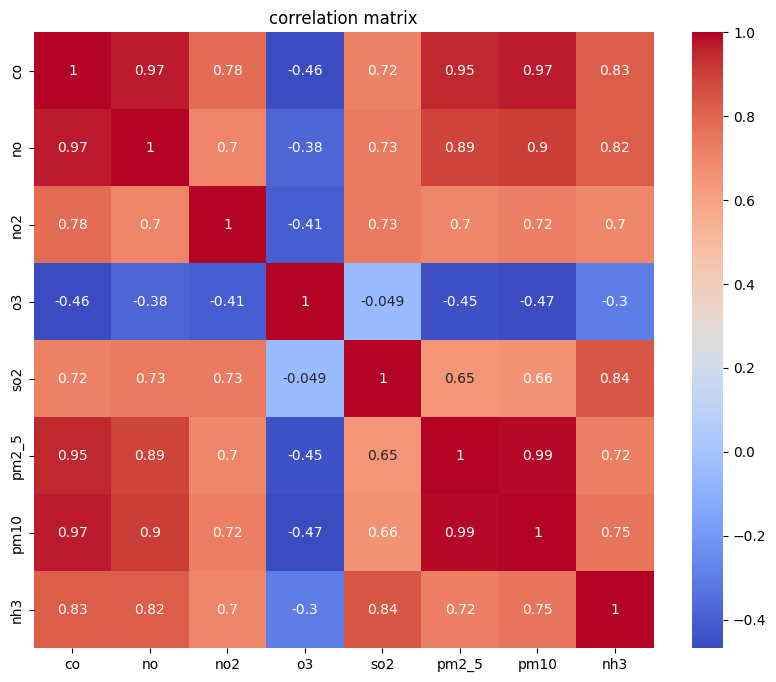

In [9]:
cm = df.iloc[:,1:9].corr()
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,cmap="coolwarm")
plt.title("correlation matrix")
plt.show()

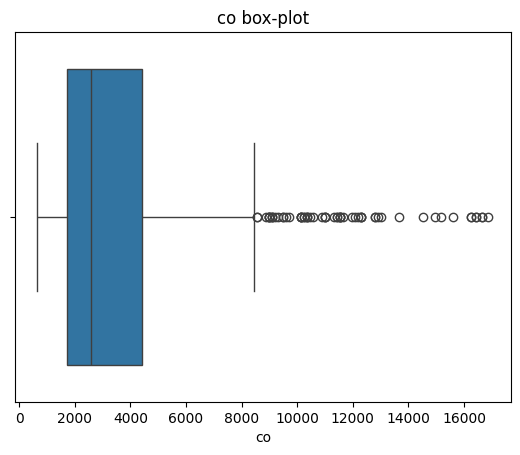

In [10]:
sns.boxplot(x=df['co'])
plt.title('co box-plot')
plt.show()

In [11]:
Q1 = df['co'].quantile(0.25)
Q3 = df['co'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Lower Bound: -2376.57, Upper Bound: 8518.23


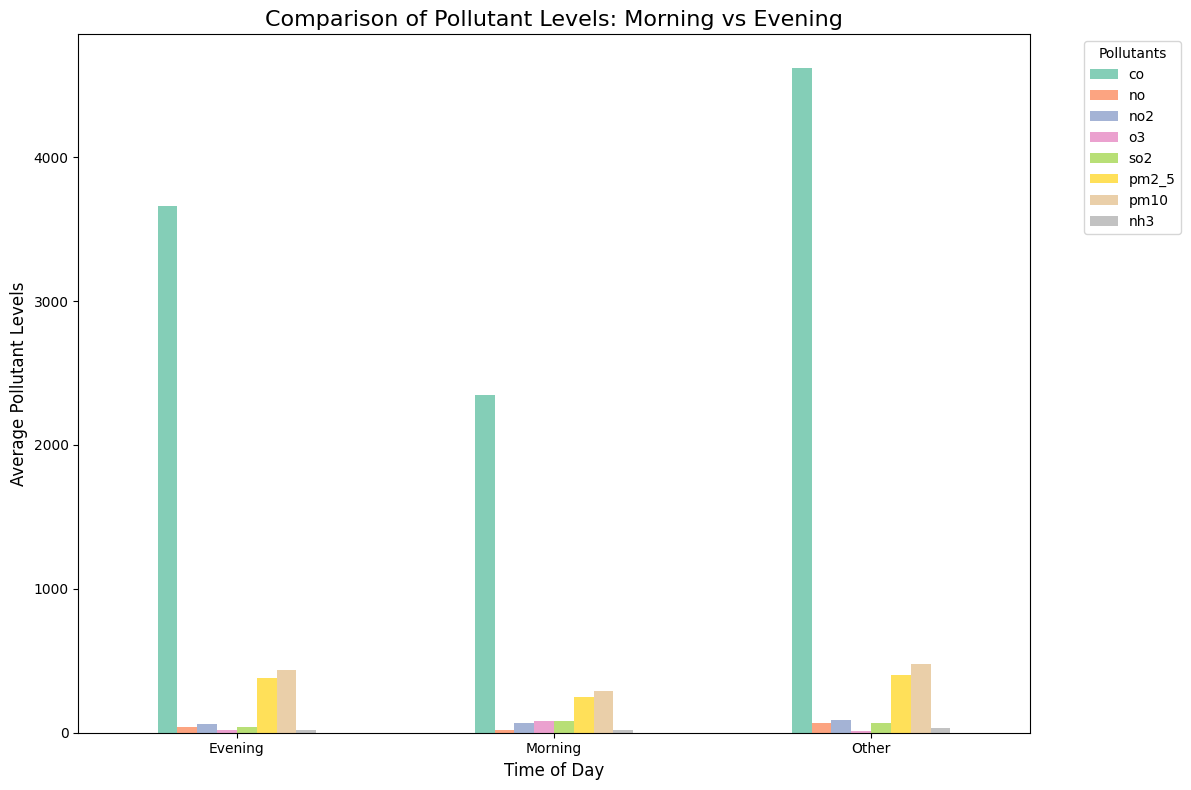

,co,no,no2,o3,so2,pm2_5,pm10,nh3
time_of_day,,,,,,,,
Evening,3659.068551,42.531449,59.407391,17.446087,40.544638,378.130797,437.928623,19.785000
Morning,2350.801064,21.507021,67.662057,81.204752,79.900355,248.868156,287.379291,15.903617
Other,4623.291383,70.252695,86.881277,10.823404,68.832872,403.224681,479.503085,34.935177


In [12]:
# Define morning and evening time intervals
def categorize_time(hour):
    if 6 <= hour < 12:
        return "Morning"
    elif 18 <= hour < 24:
        return "Evening"
    else:
        return "Other"

# Categorize hours into time intervals
df['time_of_day'] = df['Hour'].apply(categorize_time)

pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
# Group by time_of_day and calculate mean levels of pollutants
time_of_day_means = df.groupby('time_of_day')[pollutants].mean()

# Plot the differences in pollutant levels between morning and evening
time_of_day_means.plot(kind='bar', figsize=(12, 8), colormap='Set2', alpha=0.8)
plt.title("Comparison of Pollutant Levels: Morning vs Evening", fontsize=16)
plt.xlabel("Time of Day", fontsize=12)
plt.ylabel("Average Pollutant Levels", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Pollutants", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

time_of_day_means

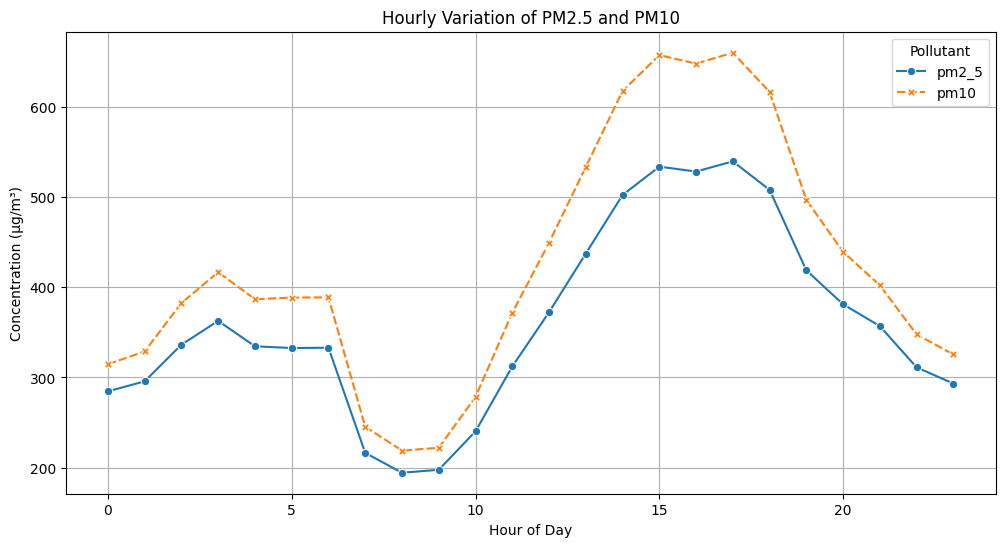

In [13]:
# Hourly variation of PM2.5 and PM10
hourly_avg = df.groupby('Hour')[['pm2_5', 'pm10']].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_avg, markers=True)
plt.title('Hourly Variation of PM2.5 and PM10')
plt.ylabel('Concentration (µg/m³)')
plt.xlabel('Hour of Day')
plt.legend(title='Pollutant')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

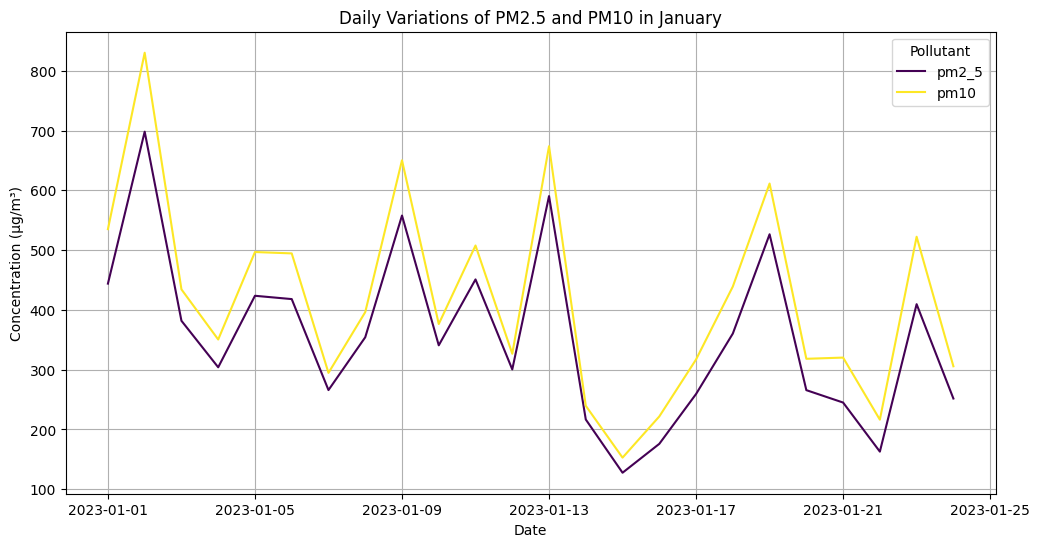

,pm2_5,pm10
date,,
2023-01-02,698.104167,830.148750
2023-01-13,590.368333,673.778333
2023-01-09,557.806250,650.216667
2023-01-19,526.485833,611.337917
2023-01-11,450.968750,507.721250


In [14]:
# Calculate daily averages for PM2.5 and PM10
daily_avg = df.groupby(df['date'].dt.date)[['pm2_5', 'pm10']].mean()

# Find the days with the highest pollution levels
peak_days = daily_avg.sort_values(by=['pm2_5', 'pm10'], ascending=False).head(5)

# Plot daily trends for PM2.5 and PM10 in January
plt.figure(figsize=(12, 6))
daily_avg.plot(kind='line', figsize=(12, 6), colormap='viridis')
plt.title('Daily Variations of PM2.5 and PM10 in January')
plt.ylabel('Concentration (µg/m³)')
plt.xlabel('Date')
plt.grid(True)
plt.legend(title='Pollutant')
plt.show()

# Display the top 5 peak pollution days
peak_days

<Figure size 1000x600 with 0 Axes>

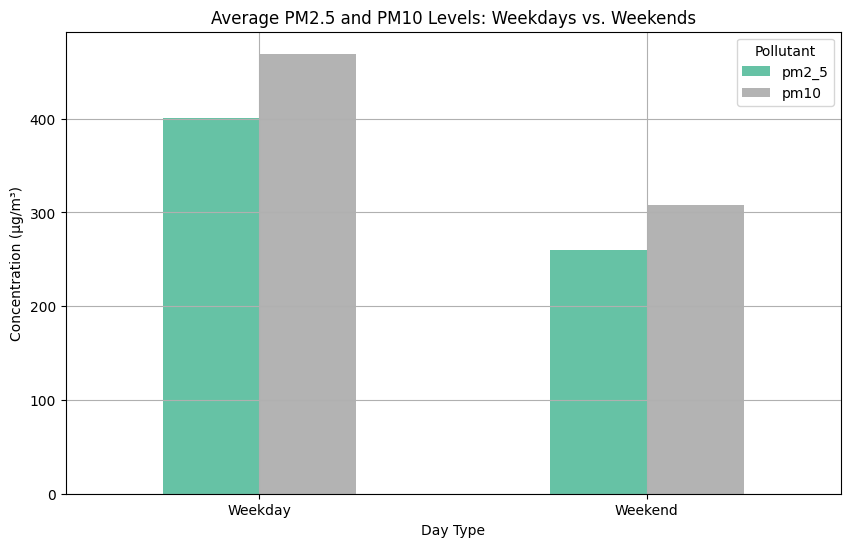

,pm2_5,pm10
day_type,,
Weekday,400.480534,469.346997
Weekend,259.481964,307.863869


In [49]:
# Add a column for the day of the week
df['day_of_week'] = df['date'].dt.day_name()

# Categorize df into weekday and weekend
df['day_type'] = df['day_of_week'].apply(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday'
)

# Compute average pollution levels for weekdays vs. weekends
day_type_avg = df.groupby('day_type')[['pm2_5', 'pm10']].mean()

# Compute Hourly averages for weekdays and weekends
Hourly_trends = df.groupby(['day_type', 'Hour'])[['pm2_5', 'pm10']].mean().reset_index()

# Visualize pollution levels by day type (Weekday vs. Weekend)
plt.figure(figsize=(10, 6))
day_type_avg.plot(kind='bar', figsize=(10, 6), colormap='Set2', rot=0)
plt.title('Average PM2.5 and PM10 Levels: Weekdays vs. Weekends')
plt.ylabel('Concentration (µg/m³)')
plt.xlabel('Day Type')
plt.legend(title='Pollutant')
plt.grid(True)
plt.show()

# Display the computed averages for further inspection
day_type_avg

In [21]:
Hourly_trends.head()

,day_type,Hour,pm2_5,pm10
0,Weekday,0,311.263529,346.052353
1,Weekday,1,326.811176,365.004118
2,Weekday,2,377.854706,430.626471
3,Weekday,3,412.413529,473.384706
4,Weekday,4,377.895294,434.959412


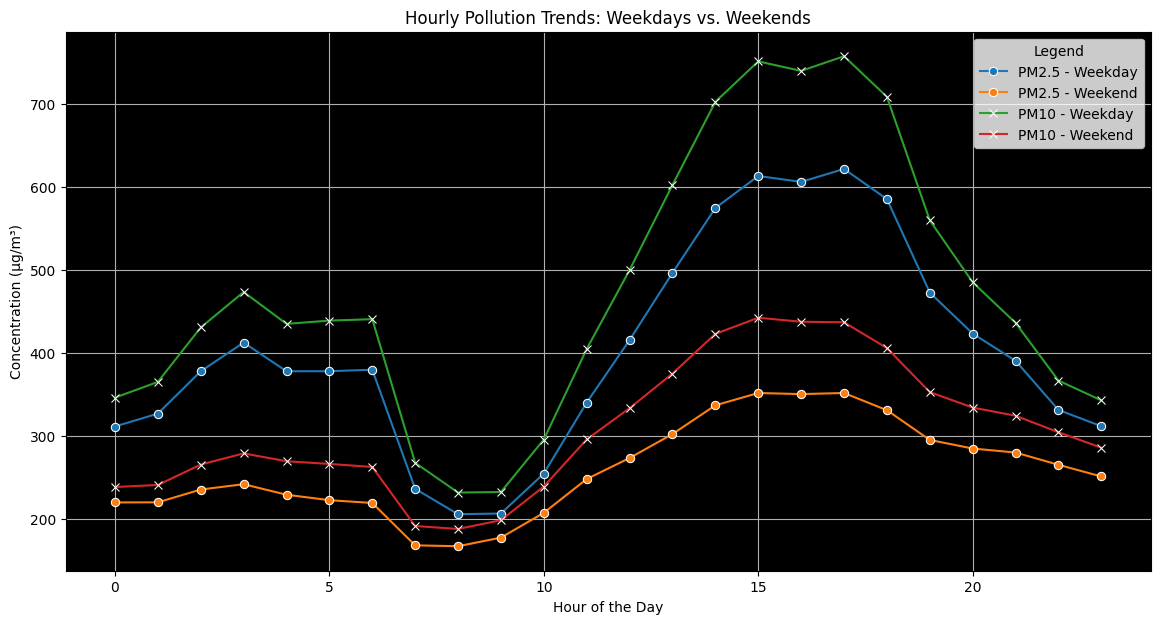

In [ ]:
plt.figure(figsize=(14, 7))

# Line plot for PM2.5 - Weekdays
sns.lineplot(data=Hourly_trends[Hourly_trends['day_type'] == 'Weekday'],x='Hour',y='pm2_5',marker='o',label='PM2.5 - Weekday',color='red')

# Line plot for PM2.5 - Weekends
sns.lineplot(data=Hourly_trends[Hourly_trends['day_type'] == 'Weekend'],x='Hour',y='pm2_5',marker='o',label='PM2.5 - Weekend',)

# Line plot for PM10 - Weekdays
sns.lineplot(data=Hourly_trends[Hourly_trends['day_type'] == 'Weekday'],x='Hour',y='pm10',marker='x',label='PM10 - Weekday',)

# Line plot for PM10 - Weekends
sns.lineplot(data=Hourly_trends[Hourly_trends['day_type'] == 'Weekend'],x='Hour',y='pm10',marker='x',label='PM10 - Weekend',)

plt.gca().set_facecolor('black')
plt.title('Hourly Pollution Trends: Weekdays vs. Weekends')
plt.ylabel('Concentration (µg/m³)')
plt.xlabel('Hour of the Day')
plt.legend(title='Legend', loc='upper right')
plt.grid(True)
plt.show()
